# EDA - Hotel booking demand

In [9]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import scatter_matrix

In [10]:
# load the data
df = pd.read_csv('data/hotel_bookings.csv')

## Understanding the data

In [11]:
# the next few steps will give us a first impression of the data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [16]:
# let's see how many years are covered
df.arrival_date_year.unique()

array([2015, 2016, 2017])

In [17]:
# checking for nulls
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Hypothesis
1. Highest revenues can be achieved during summer months.
3. More guest tend to cancel when prices are higher.

## Exploring the data

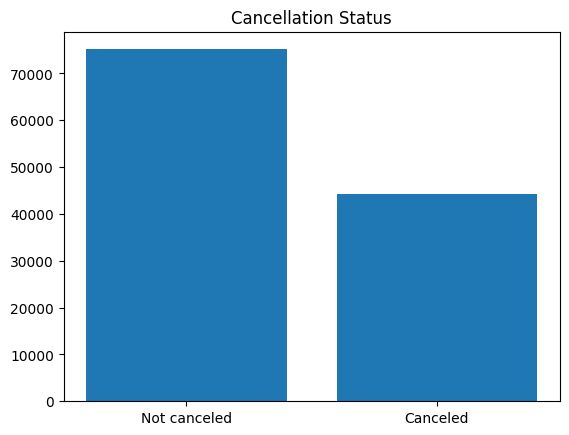

In [18]:
# plot to see the cancellations
plt.title('Cancellation Status')
plt.bar(['Not canceled' , 'Canceled'],df['is_canceled'].value_counts())
plt.show()

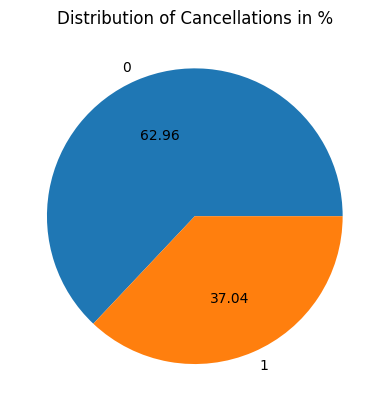

In [19]:
# cancellations in percent
plt.pie(df.groupby(["is_canceled"]).size(), labels = df["is_canceled"].unique(), autopct = "%0.2f")
plt.title('Distribution of Cancellations in %')
plt.show()

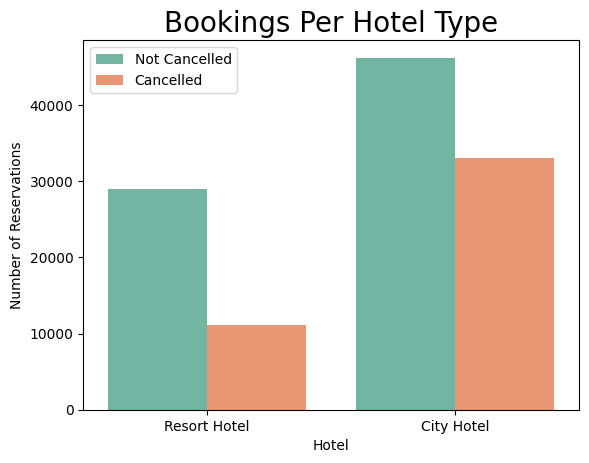

In [20]:
# distribution of the hotel type with the cancellations
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette="Set2")
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))
plt.title('Bookings Per Hotel Type', size=20, color='Black')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Number of Reservations', color='Black')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

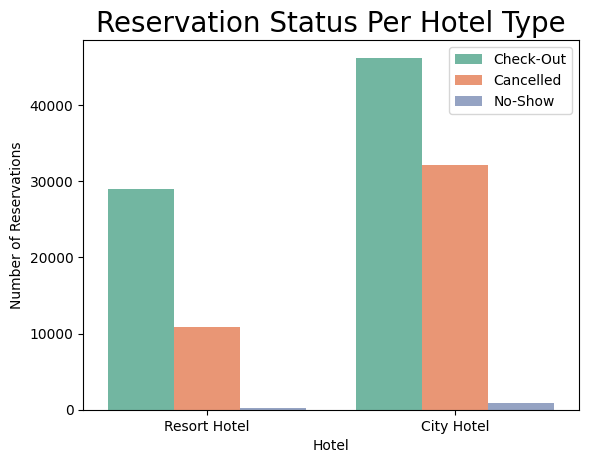

In [21]:
# checking the difference between cancellations and not showing up without telling the hotel
ax1 = sns.countplot(x='hotel', hue='reservation_status', data=df, palette="Set2")
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation Status Per Hotel Type', size=20, color='Black')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Number of Reservations', color='Black')
plt.legend(['Check-Out', 'Cancelled', 'No-Show'])
plt.show()

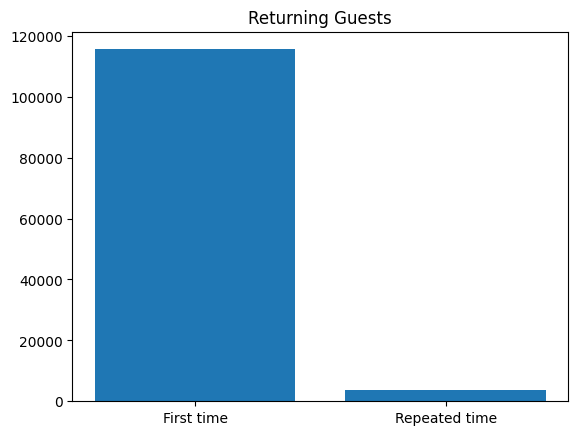

In [22]:
# how many guest booked the hotels for the first time and how many guest were coming back
plt.title('Returning Guests')
plt.bar(['First time' , 'Repeated time'],df['is_repeated_guest'].value_counts())
plt.show()

In [23]:
# how do guests like to book
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

In [24]:
# let's see the distribution of children
df['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [25]:
# sort values for children
df.sort_values('children',ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,No Deposit,8.0,NaN,0,Contract,133.16,0,1,No-Show,2015-07-12
116832,City Hotel,0,14,2017,July,30,24,1,1,0,...,No Deposit,NaN,NaN,0,Transient-Party,0.00,0,3,Check-Out,2017-07-26
40984,City Hotel,0,1,2015,August,33,10,1,1,0,...,No Deposit,NaN,NaN,0,Transient-Party,9.00,0,0,Check-Out,2015-08-12
119070,City Hotel,0,0,2017,August,35,29,0,1,2,...,No Deposit,229.0,NaN,0,Group,270.00,0,1,Check-Out,2017-08-30
106387,City Hotel,0,3,2017,February,8,22,0,3,2,...,No Deposit,9.0,NaN,0,Transient,275.00,0,2,Check-Out,2017-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,NaN,NaN,0,Transient-Party,12.00,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,NaN,0,Transient-Party,12.00,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,NaN,NaN,0,Transient-Party,18.00,0,2,Canceled,2015-08-04


In [26]:
# let's see the distribution of babies
df['babies'].value_counts()

babies
0     118473
1        900
2         15
10         1
9          1
Name: count, dtype: int64

In [27]:
df.sort_values('babies',ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,...,No Deposit,9.0,NaN,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,...,No Deposit,95.0,NaN,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14
94063,City Hotel,0,4,2016,July,31,27,0,4,2,...,No Deposit,9.0,NaN,0,Transient,176.00,0,2,Check-Out,2016-07-31
104351,City Hotel,0,19,2017,January,2,8,2,2,2,...,No Deposit,14.0,NaN,0,Transient,119.50,0,0,Check-Out,2017-01-12
33332,Resort Hotel,0,31,2017,February,8,19,1,0,2,...,No Deposit,240.0,NaN,0,Transient-Party,50.00,1,2,Check-Out,2017-02-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40138,City Hotel,0,3,2015,July,28,11,0,1,3,...,No Deposit,17.0,NaN,0,Transient-Party,104.00,0,0,Check-Out,2015-07-12
40137,City Hotel,0,71,2015,July,28,11,0,1,1,...,No Deposit,11.0,NaN,0,Transient,51.96,0,0,Check-Out,2015-07-12
40136,City Hotel,0,3,2015,July,28,11,0,1,2,...,No Deposit,17.0,NaN,0,Transient-Party,75.00,0,0,Check-Out,2015-07-12
40135,City Hotel,0,71,2015,July,28,11,0,1,1,...,No Deposit,11.0,NaN,0,Transient,51.96,0,0,Check-Out,2015-07-12


In [28]:
# preparation for the map
origin_country = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
origin_country.columns = ['country', 'no_of_guests']
origin_country

,country,no_of_guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [29]:
#pip install ipykernel

In [30]:
#pip install --upgrade nbformat

In [31]:
# printing a map to distribute the bookings per country
color_scale = px.colors.sequential.Plasma

fig = px.choropleth(origin_country,
                   locations='country',
                   color='no_of_guests',
                   hover_name='country',
                   color_continuous_scale=color_scale,
                   title='Country Wise Distribution of Guests',
                   labels={'no_of_guests': 'Number of Guests'},
                   projection="natural earth")

fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
    showocean=True,
    oceancolor="lightblue"
)

fig.update_coloraxes(colorbar_title="Number of Guests")
fig.show()

## Cleaning the data

In [32]:
# replacing the null values with 0 in the children column
df['children'] = df['children'].fillna(0)

# dropping company and agent column
df.drop(['company', 'agent'], axis =1, inplace = True)

# dropping the rest of the nulls
df.dropna(inplace =True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [33]:
# since it is easier to handel we can combine the duration of stay into one column and than drop the old ones
df['duration_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

df.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'], inplace=True)

In [34]:
df.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [35]:
# changing the month column from names to integers
df['arrival_month'] = pd.to_datetime(df['arrival_date_month'], format= '%B').dt.month
df.drop(columns=['arrival_date_month'], inplace=True)

In [36]:
# changing the type from object to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [37]:
# renaming just to make the name shorter
df.rename(columns={'arrival_date_week_number': 'arrival_week', 'arrival_date_year': 'arrival_year', 'arrival_date_day_of_month': 'arrival_day'}, inplace=True)

In [38]:
# drop irrational data we found in the babies column
df.drop([46619,78656], axis=0, inplace=True)

In [39]:
#drop irrational data with the 10 children
df.drop(328, axis=0, inplace=True)

In [40]:
# there is no need for us to keep these columns separate
df['total_kids'] = df['children'] + df['babies']

df.drop(columns=['children', 'babies'], inplace=True)

In [41]:
# replacing outliers with the median (because mean values are highly influenced by outliers)
from statistics import median

df['adr'] = df['adr'].mask(df['adr'] >5000, median)
df['adr'] = df['adr'].mask(df['adr'] <0, median)

In [42]:
# check if all the changes worked
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 118899 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118899 non-null  object        
 1   is_canceled                     118899 non-null  int64         
 2   lead_time                       118899 non-null  int64         
 3   arrival_year                    118899 non-null  int64         
 4   arrival_week                    118899 non-null  int64         
 5   arrival_day                     118899 non-null  int64         
 6   adults                          118899 non-null  int64         
 7   meal                            118899 non-null  object        
 8   country                         118899 non-null  object        
 9   market_segment                  118899 non-null  object        
 10  distribution_channel            118899 non-null  object      

,is_canceled,lead_time,arrival_year,arrival_week,arrival_day,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,duration_of_stay,arrival_month,total_kids
count,118899.000000,118899.000000,118899.000000,118899.000000,118899.000000,118899.000000,118899.000000,118899.000000,118899.000000,118899.000000,118899.000000,118899.000000,118899.000000,118899.000000,118899,118899.000000,118899.000000,118899.00000
mean,0.371374,104.309792,2016.157638,27.166789,15.800671,1.858409,0.032010,0.087141,0.131633,0.221146,2.330734,101.956987,0.061884,0.571704,2016-07-30 07:30:58.905457920,3.430954,6.552948,0.11191
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00,0.000000,1.000000,0.00000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00,2.000000,4.000000,0.00000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00,3.000000,7.000000,0.00000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00,4.000000,9.000000,0.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,55.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00,57.000000,12.000000,3.00000
std,0.483174,106.903860,0.707472,13.589696,8.780457,0.578577,0.176028,0.845865,1.484666,0.652755,17.630379,48.091748,0.244171,0.792685,NaN,2.544776,3.086990,0.41035


## Relationships in the data

<Axes: >

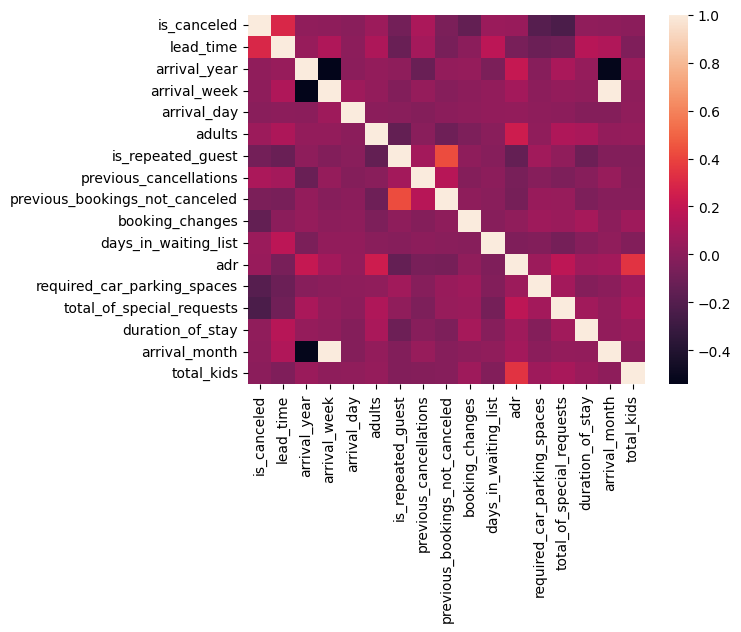

In [43]:
#let's check for correlations for the columns with numerical values
sns.heatmap(df.corr(numeric_only=True))
#but this will not show me a correlation of the arrival date, the hotel types etc.

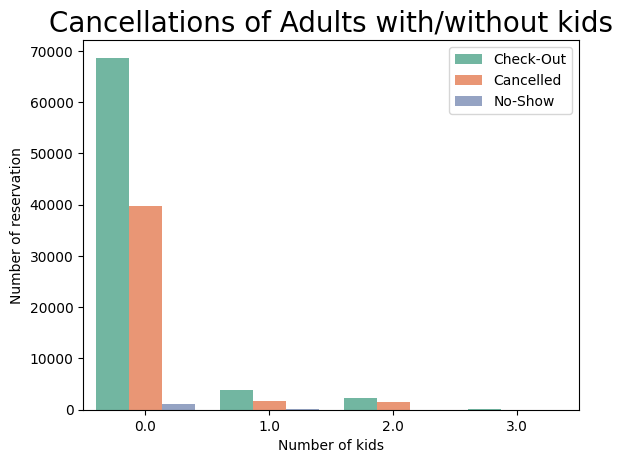

In [44]:
# let's see if families or guests without kids cancel most
sns.countplot(x='total_kids', hue='reservation_status', data= df, palette = 'Set2')
plt.title('Cancellations of Adults with/without kids', size = 20)
plt.xlabel('Number of kids')
plt.ylabel('Number of reservation')
plt.legend(['Check-Out', 'Cancelled', 'No-Show'])
plt.show()

In [45]:
fig = px.pie(df, values='is_canceled', names='total_kids')
fig.show()

### 1. Hypothesis
1. Highest revenues can be achieved during summer months.

Text(0, 0.5, 'Number of Guests')

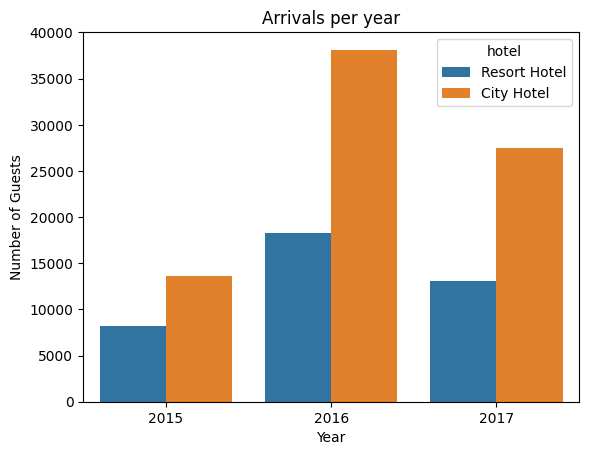

In [46]:
# distribution of each hotel with the amount of guests who arrived
sns.countplot(data=df, x='arrival_year', hue='hotel')
plt.title('Arrivals per year')
plt.xlabel('Year')
plt.ylabel('Number of Guests')

Text(0, 0.5, 'Number of Guests')

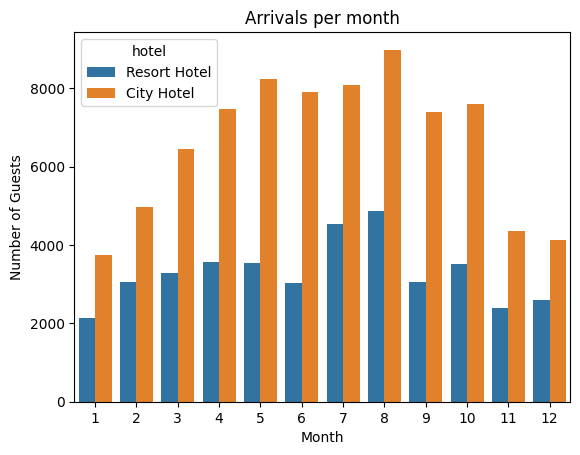

In [47]:
# plot the visualize if there is a seasonal peak
sns.countplot(data=df, x='arrival_month', hue='hotel')
plt.title('Arrivals per month')
plt.xlabel('Month')
plt.ylabel('Number of Guests')

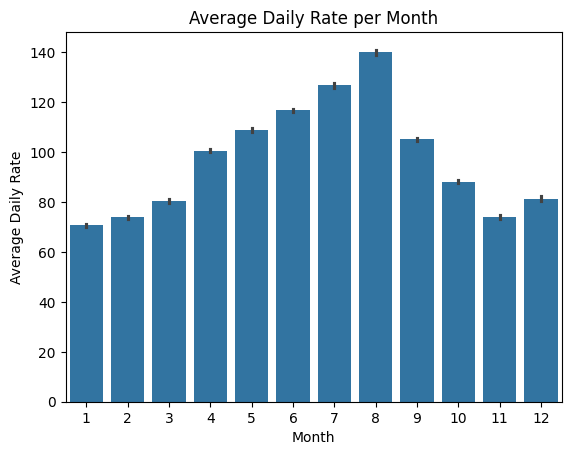

In [48]:
# plot to see if there are changes in the adr over season and off-season
sns.barplot(data=df, x='arrival_month', y='adr')
plt.title('Average Daily Rate per Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.show()

There is indeed a seasonal peak for both hotels in July and August. Regarding the ADR we can also see that the price per booking is also on a peak during these months. Which means that more overall guests compared to other months and a higher price will generate the highest revenue for both hotels.

### 2. Hypothesis
More guest tend to cancel when prices are higher.

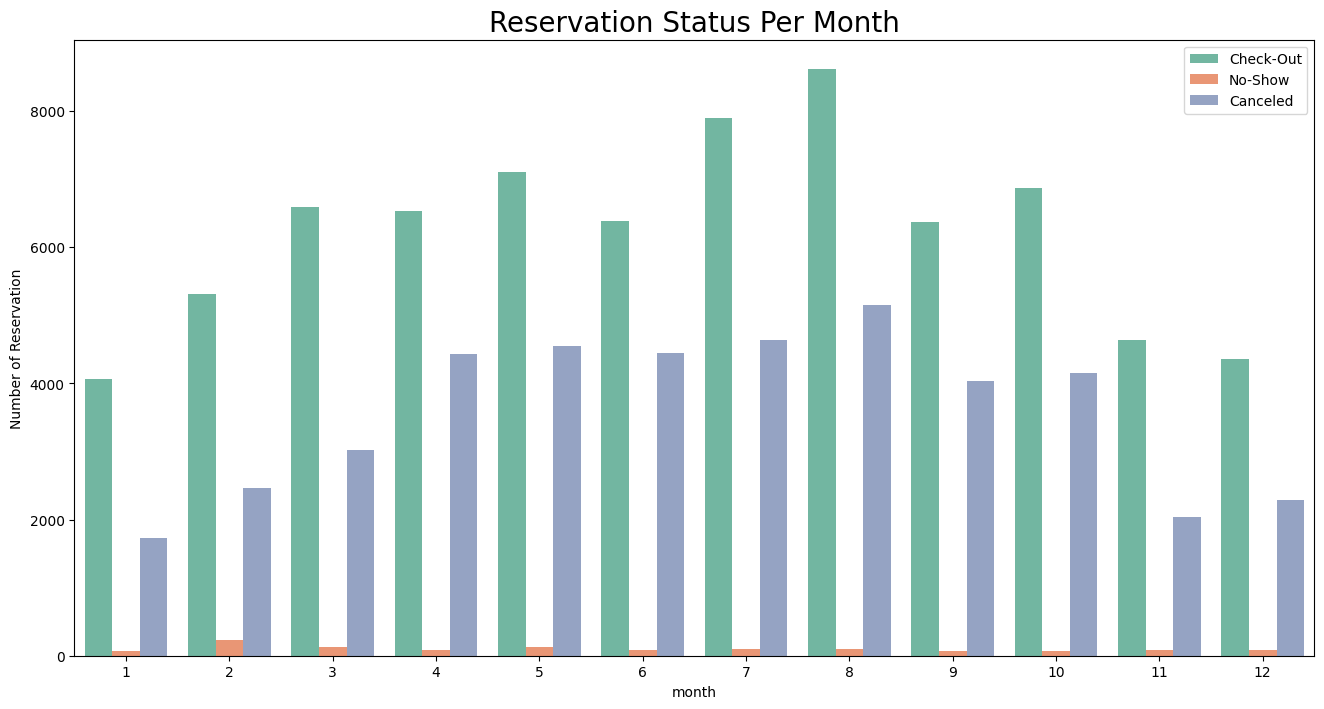

In [49]:
# plotting the reservation status distributing per month to see if there is a seasonal trend (in bookings and also cancellations)
plt.figure(figsize=(16,8))
ax1= sns.countplot(x='arrival_month', hue='reservation_status', data= df, palette = 'Set2')
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation Status Per Month', size = 20)
plt.xlabel('month')
plt.ylabel('Number of Reservation')
plt.legend(['Check-Out', 'No-Show', 'Canceled'])
plt.show()

Most cancelations appear from April-August. If we look back at the ADR, we can see that this also fits with rising prices.

In [50]:
#pip freeze

appnope==0.1.4
asttokens==2.4.1
attrs==23.2.0
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
debugpy==1.8.2
decorator==5.1.1
executing==2.0.1
fastjsonschema==2.20.0
fonttools==4.53.1
ipykernel==6.29.5
ipython==8.26.0
jedi==0.19.1
jsonschema==4.23.0
jsonschema-specifications==2023.12.1
jupyter_client==8.6.2
jupyter_core==5.7.2
kiwisolver==1.4.5
matplotlib==3.9.1
matplotlib-inline==0.1.7
nbformat==5.10.4
nest-asyncio==1.6.0
numpy==2.0.0
packaging==24.1
pandas==2.2.2
parso==0.8.4
pexpect==4.9.0
pillow==10.4.0
platformdirs==4.2.2
plotly==5.22.0
prompt_toolkit==3.0.47
psutil==6.0.0
ptyprocess==0.7.0
pure-eval==0.2.2
Pygments==2.18.0
pyparsing==3.1.2
python-dateutil==2.9.0.post0
pytz==2024.1
pyzmq==26.0.3
referencing==0.35.1
rpds-py==0.19.0
seaborn==0.13.2
six==1.16.0
stack-data==0.6.3
tenacity==8.5.0
tornado==6.4.1
traitlets==5.14.3
typing_extensions==4.12.2
tzdata==2024.1
wcwidth==0.2.13
Note: you may need to restart the kernel to use updated packages.
